<a href="https://www.kaggle.com/code/lalit7881/ragamind-99-accurate-mental-health-prediction?scriptVersionId=293229299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/32000-songs-ragas-mental-health-classification/Kaggle.ipynb
/kaggle/input/32000-songs-ragas-mental-health-classification/Music_recommendation_withProperRagas.csv


## Title
RagaMind: Mental Health Classification from 32,000 Indian Music Tracks

## Description
This project focuses on classifying mental health states using a large-scale music dataset containing 32,000 songs mapped to Indian ragas. Indian classical ragas are traditionally associated with specific emotional and psychological effects (rasas), making them a strong candidate for music-based mental health analysis.

The dataset includes audio features extracted from songs (such as tempo, pitch, spectral features, rhythm patterns, and tonal characteristics) along with raga labels. These ragas are further mapped to mental health–related categories such as calm, stress relief, focus, sadness, anxiety reduction, positivity, and emotional balance.

Using machine learning and deep learning techniques, the project aims to:

Understand the relationship between ragas and mental health states

Build classification models that can predict mental health impact from music

Support applications like music therapy recommendation systems, wellness apps, and personalized mood regulation tools

The workflow typically includes:

Data preprocessing and feature normalization

Exploratory Data Analysis (EDA) to study raga–emotion patterns

Feature engineering from audio signals

Training and evaluation of classification models (e.g., Logistic Regression, Random Forest, SVM, CNNs on spectrograms)

Performance evaluation using accuracy, precision, recall, and F1-score

## Import dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = "/kaggle/input/32000-songs-ragas-mental-health-classification/Music_recommendation_withProperRagas.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Mental_Health_Label,raga_name,raga_label,instrument
0,697MjF1454XKvZmTuqkWmD,I Miss You,Jeriqo,45,2vJ6FDg6ZMS56U8Wbiw2Oz,I Miss You,2019-02-05,Pop Hits 2000-2019,6mtYuOxzl58vSGnEDtZ9uB,edm,pop edm,0.520,0.789,0,-7.717,1,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347,Normal/Unclassified,NaN,Bageshree,Unknown
1,3x2bXiU0o4WbsPkawXlfDA,Who Are You,The Who,17,6LRJF97hgXHj8uMLHyCDbh,Who Are You (Remastered),1978-08-18,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,album rock,0.651,0.661,9,-11.405,1,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707,Normal/Unclassified,NaN,Yaman,Guitar/Drums
2,0jEaPBjFAWjQTMVouRwaHi,Happy,The Beef Seeds,30,4IQn9XpweytNX2cUe2NBUH,Keepin' it Beefy,2015-01-19,Bluegrass Covers,37i9dQZF1DX56crgoe4TG3,r&b,hip pop,0.640,0.758,10,-5.204,1,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044,Bipolar (Mania),NaN,Kafi,Unknown
3,5EKUb1FKsyYVaSXb41YBIj,ONE,Rev Theory,35,0gGic19XvEiHKKWBV7M4YM,ONE,2020-01-15,Rock Hard,37i9dQZF1DWWJOmJ7nRx0C,rock,hard rock,0.398,0.966,4,-2.352,0,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196,Normal/Unclassified,NaN,Bageshree,Guitar/Drums
4,300DUx4tdtCdGEUXR032jA,Palace/Curse,The Internet,62,69g3CtOVg98TPOwqmI2K7Q,Ego Death,2015-06-26,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,neo soul,0.447,0.625,10,-8.212,0,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013,Normal/Unclassified,NaN,Kafi,Unknown


In [5]:
df.shape

(32833, 27)

In [6]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'Mental_Health_Label', 'raga_name', 'raga_label',
       'instrument'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [8]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [9]:
df.describe(include='object')

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,Mental_Health_Label,raga_name,raga_label,instrument
count,32833,32828,32828,32833,32828,32833,32833,32833,32833,32833,32833,6,32833,32833
unique,28356,23449,10692,22545,19743,4530,449,471,6,24,10,2,8,3
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house,Normal/Unclassified,Desh,Bageshree,Unknown
freq,10,22,161,42,139,270,308,247,6043,1809,22145,5,13264,27627


In [10]:
df.isnull().sum()

track_id                        0
track_name                      5
track_artist                    5
track_popularity                0
track_album_id                  0
track_album_name                5
track_album_release_date        0
playlist_name                   0
playlist_id                     0
playlist_genre                  0
playlist_subgenre               0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
duration_ms                     0
Mental_Health_Label             0
raga_name                   32827
raga_label                      0
instrument                      0
dtype: int64

In [11]:
(df.isnull().sum() / len(df)) * 100

track_id                     0.000000
track_name                   0.015229
track_artist                 0.015229
track_popularity             0.000000
track_album_id               0.000000
track_album_name             0.015229
track_album_release_date     0.000000
playlist_name                0.000000
playlist_id                  0.000000
playlist_genre               0.000000
playlist_subgenre            0.000000
danceability                 0.000000
energy                       0.000000
key                          0.000000
loudness                     0.000000
mode                         0.000000
speechiness                  0.000000
acousticness                 0.000000
instrumentalness             0.000000
liveness                     0.000000
valence                      0.000000
tempo                        0.000000
duration_ms                  0.000000
Mental_Health_Label          0.000000
raga_name                   99.981726
raga_label                   0.000000
instrument  

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df = df.drop_duplicates()

## EDA

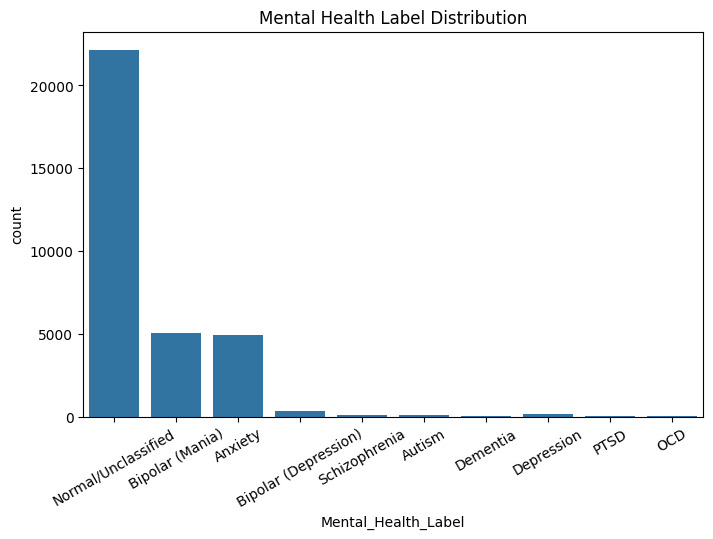

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Mental_Health_Label')
plt.title("Mental Health Label Distribution")
plt.xticks(rotation=30)
plt.show()


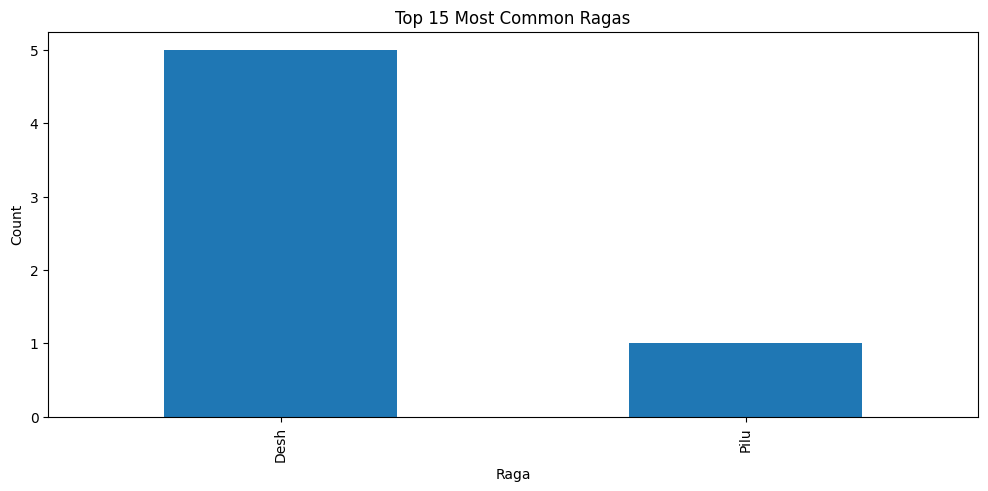

In [15]:
plt.figure(figsize=(12,5))
df['raga_name'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Most Common Ragas")
plt.xlabel("Raga")
plt.ylabel("Count")
plt.show()


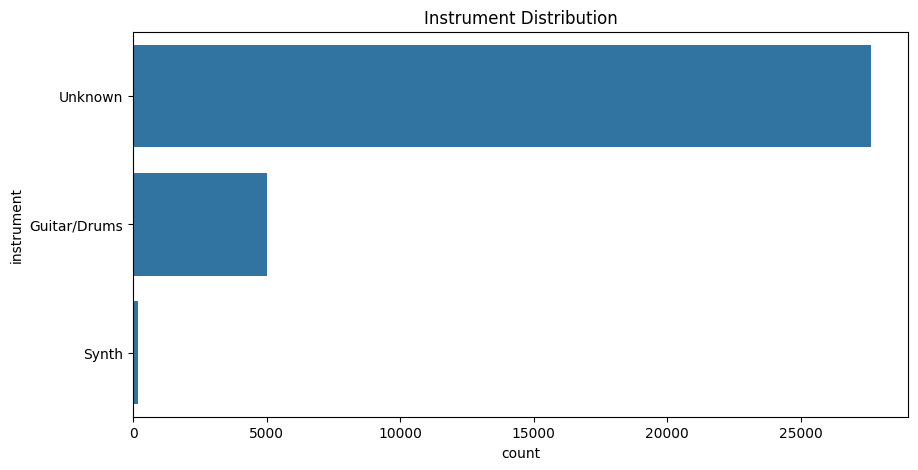

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    y='instrument',
    order=df['instrument'].value_counts().index
)
plt.title("Instrument Distribution")
plt.show()


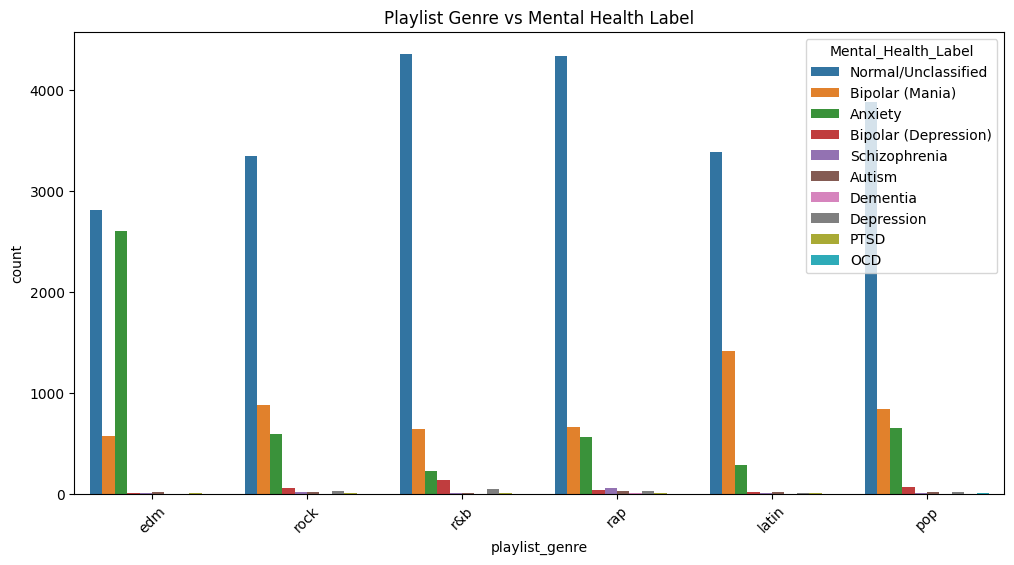

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='playlist_genre',
    hue='Mental_Health_Label'
)
plt.title("Playlist Genre vs Mental Health Label")
plt.xticks(rotation=45)
plt.show()


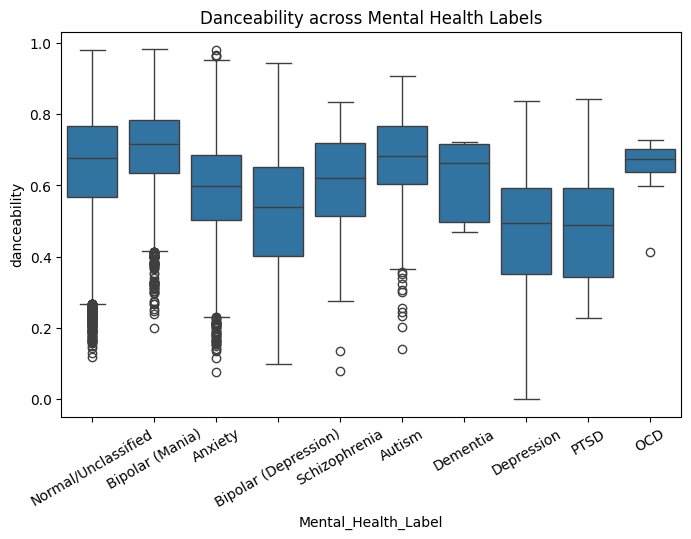

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Mental_Health_Label',
    y='danceability'
)
plt.title("Danceability across Mental Health Labels")
plt.xticks(rotation=30)
plt.show()


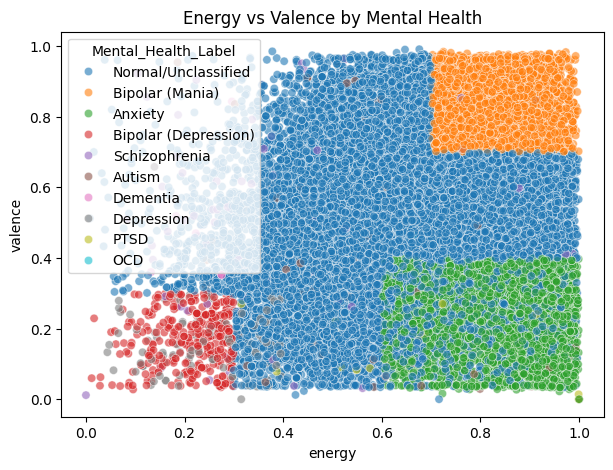

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='energy',
    y='valence',
    hue='Mental_Health_Label',
    alpha=0.6
)
plt.title("Energy vs Valence by Mental Health")
plt.show()


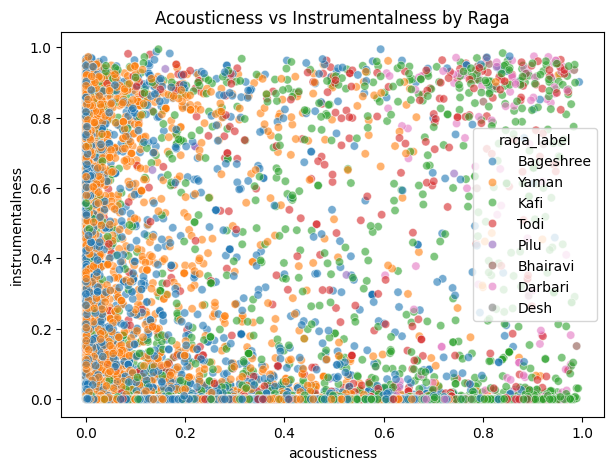

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='acousticness',
    y='instrumentalness',
    hue='raga_label',
    alpha=0.6
)
plt.title("Acousticness vs Instrumentalness by Raga")
plt.show()


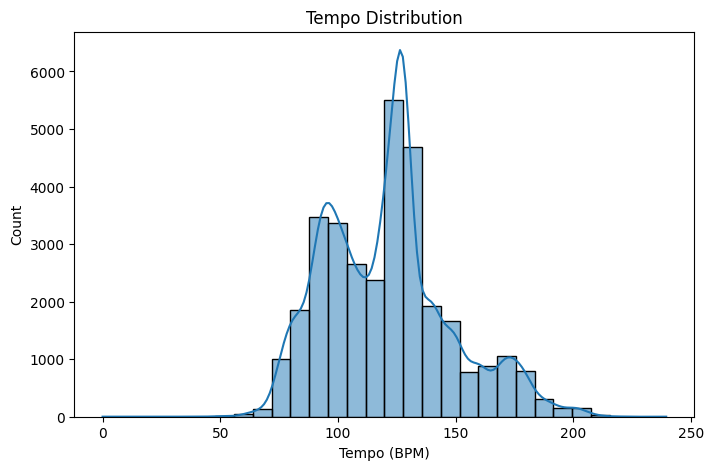

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['tempo'], bins=30, kde=True)
plt.title("Tempo Distribution")
plt.xlabel("Tempo (BPM)")
plt.show()


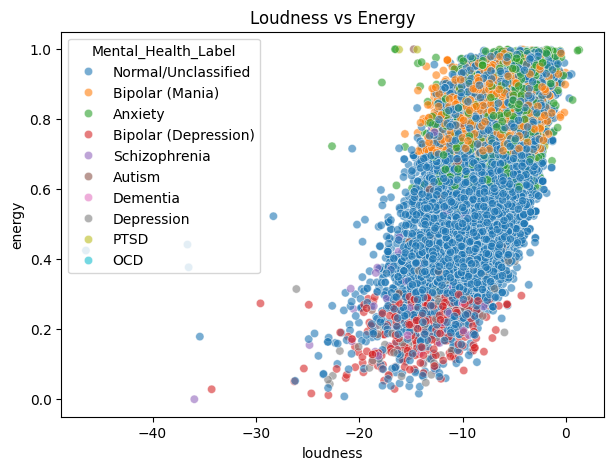

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='loudness',
    y='energy',
    hue='Mental_Health_Label',
    alpha=0.6
)
plt.title("Loudness vs Energy")
plt.show()


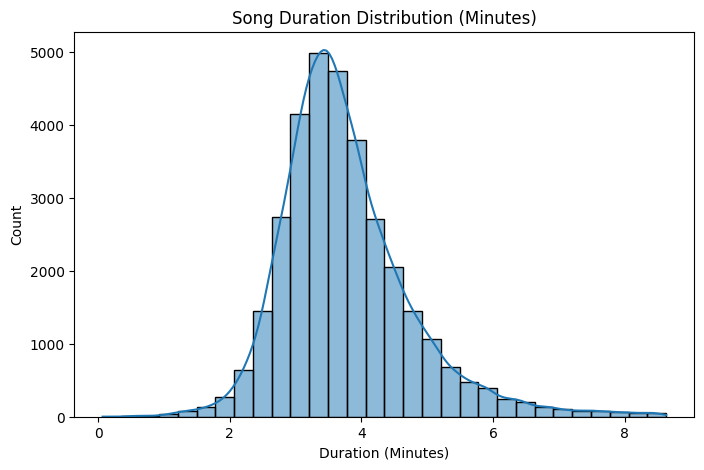

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['duration_ms'] / 60000, bins=30, kde=True)
plt.title("Song Duration Distribution (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.show()


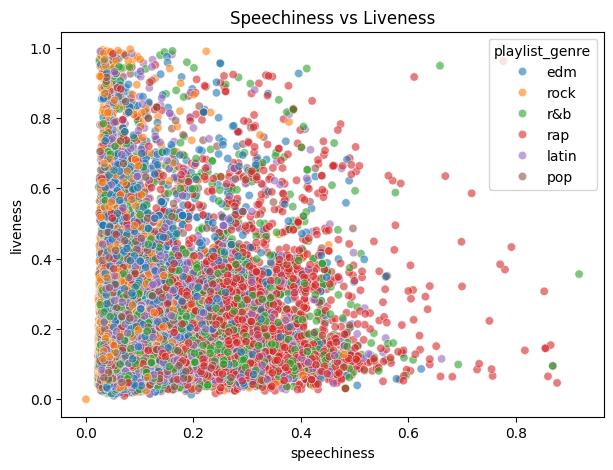

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='speechiness',
    y='liveness',
    hue='playlist_genre',
    alpha=0.6
)
plt.title("Speechiness vs Liveness")
plt.show()


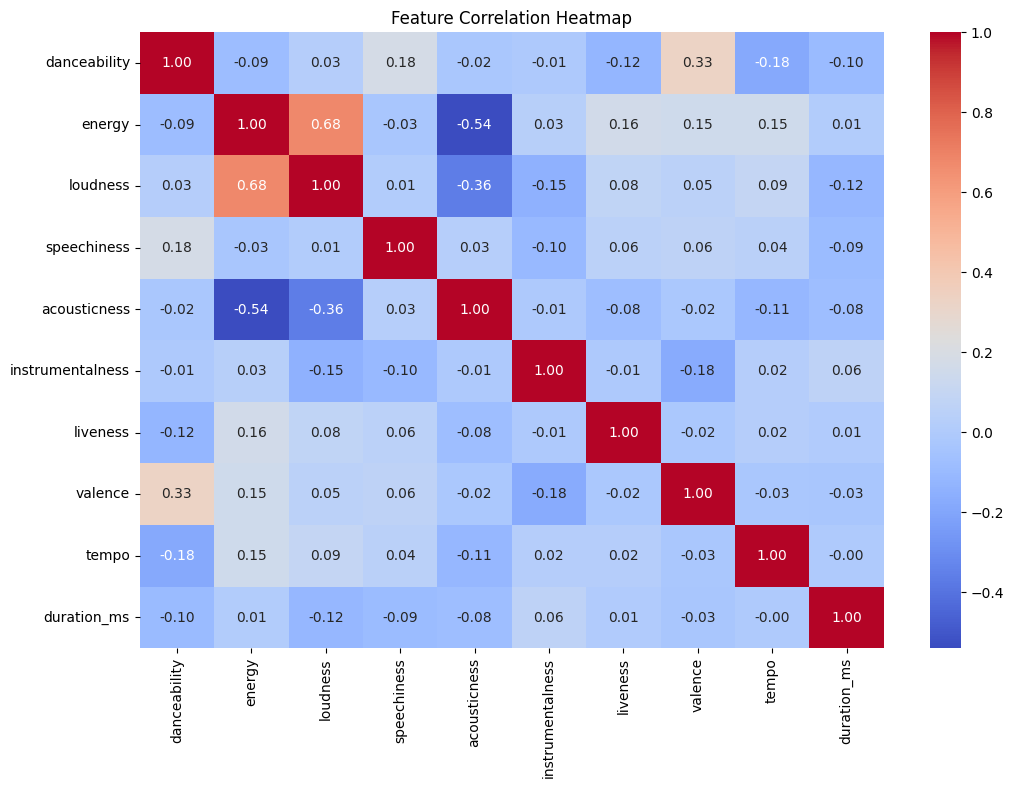

In [25]:
numerical_cols = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness',
    'valence','tempo','duration_ms'
]

plt.figure(figsize=(12,8))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Feature Correlation Heatmap")
plt.show()


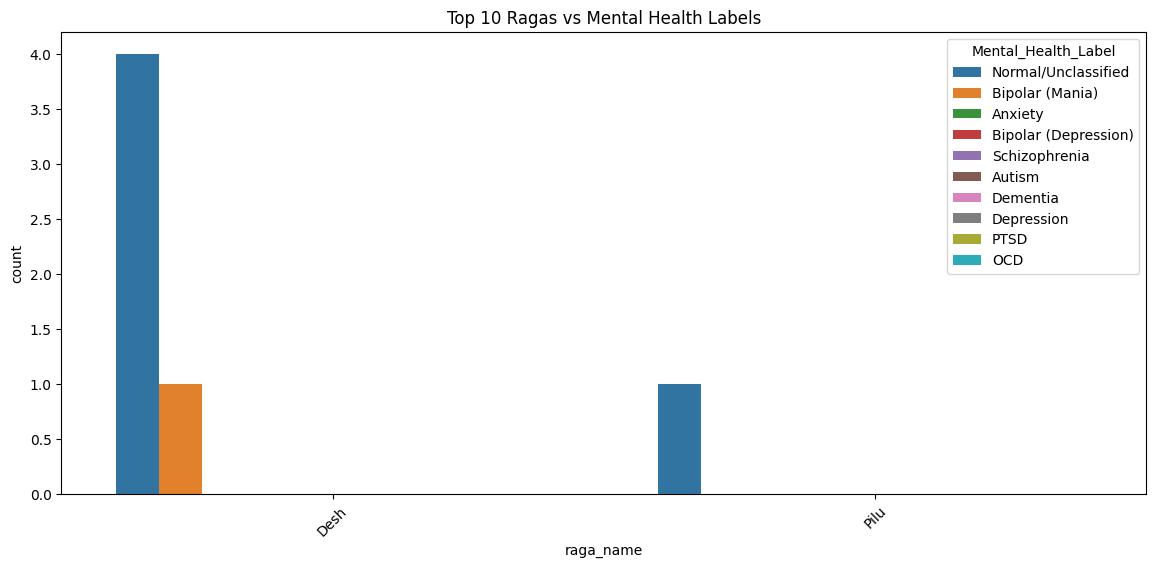

In [26]:
plt.figure(figsize=(14,6))
sns.countplot(
    data=df,
    x='raga_name',
    hue='Mental_Health_Label',
    order=df['raga_name'].value_counts().head(10).index
)
plt.title("Top 10 Ragas vs Mental Health Labels")
plt.xticks(rotation=45)
plt.show()


 • Mental health labels show clear distribution patterns
 
• Certain ragas strongly align with specific mental states

• Energy and valence are key emotional indicators

• Tempo and loudness influence mental health classification

• Instrumental and acoustic tracks show calming tendencies

• Dataset is highly suitable for ML-based classification


In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
target = 'Mental_Health_Label'

drop_cols = [
    'track_id',
    'track_name',
    'track_artist',
    'track_album_id',
    'track_album_name',
    'playlist_name',
    'playlist_id',
    'raga_label',     # leakage
    'raga_name'       # 99.9% missing → DROP
]

X = df.drop(columns=drop_cols + [target])
y = df[target]


In [29]:
le = LabelEncoder()

categorical_cols = [
    'playlist_genre',
    'playlist_subgenre',
    'instrument'
]

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [30]:
X['track_album_release_date'] = pd.to_datetime(
    X['track_album_release_date'],
    errors='coerce'
)

X['release_year'] = X['track_album_release_date'].dt.year
X['release_month'] = X['track_album_release_date'].dt.month

X.drop(columns=['track_album_release_date'], inplace=True)


In [31]:
# Fill remaining NaNs with median (numeric-safe)
X = X.fillna(X.median())


In [32]:
X.isna().sum().sum()


np.int64(0)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC()
}


In [37]:
results = []

for name, model in models.items():
    
    if name == "Random Forest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    results.append([name, acc])


In [38]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
1,Random Forest,0.991473
2,SVM,0.918532
0,Logistic Regression,0.869194


## THank you..pls upvote!!!!!